<a href="https://colab.research.google.com/github/ryanditata/dataMining/blob/main/SVR_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Memuat dataset
data = pd.read_csv('/content/drive/MyDrive/BTC-USD-1-Month.csv')

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883
2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,20050941373
2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,34873527352
2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709
2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2024-03-30 to 2024-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       29 non-null     float64
 1   High       29 non-null     float64
 2   Low        29 non-null     float64
 3   Close      29 non-null     float64
 4   Adj Close  29 non-null     float64
 5   Volume     29 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.6 KB


In [ ]:
# Melakukan preprocessing data
data['Date'] = pd.to_datetime(data['Date'])  # Mengonversi kolom 'Date' menjadi tipe datetime
data.set_index('Date', inplace=True)  # Menetapkan kolom 'Date' sebagai indeks data

# Mengasumsikan 'Close' sebagai variabel target
prices = data['Close'].values  # Mengambil nilai-nilai dari kolom 'Close' sebagai array

# Membuat fitur dan target
def create_features(data, lag_count):
    X = []
    y = []
    for i in range(lag_count, len(data)):
        # Membuat jendela data dari rentang 'lag_count' untuk digunakan sebagai fitur
        X.append(data[i-lag_count:i])
        # Nilai setelah jendela tersebut menjadi target prediksi
        y.append(data[i])
    return np.array(X), np.array(y)

# Menggunakan data 20 hari sebagai fitur
X, y = create_features(prices, 20)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Menyesuaikan dan mentransformasi data pelatihan
X_test_scaled = scaler.transform(X_test)  # Mentrasformasi data uji

# Melatih model
model = SVR(kernel='rbf', C=1000, gamma=0.1)
model.fit(X_train_scaled, y_train)

SVR(C=1000, gamma=0.1)

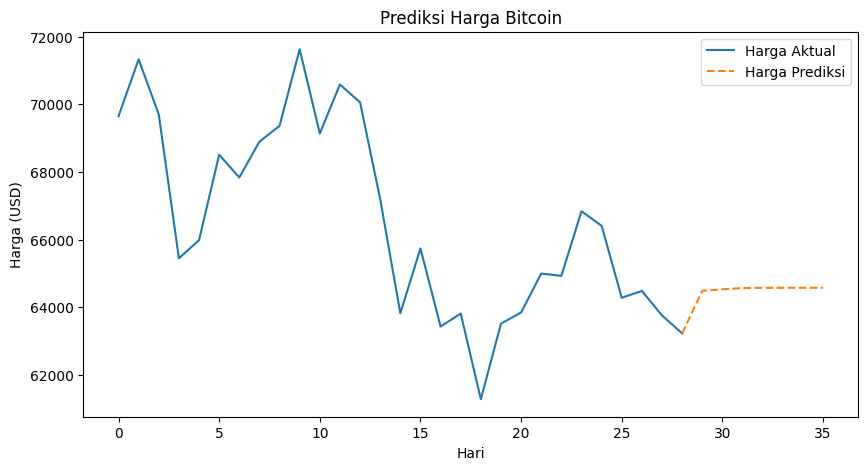

In [ ]:
# Menentukan jumlah hari untuk diprediksi ke depan
future_days = 7
latest_prices = prices[-20:]  # Mengambil 20 hari terakhir sebagai data untuk prediksi harga masa depan
future_prices_scaled = scaler.transform([latest_prices])
predicted_prices = []

# Melakukan prediksi harga ke depan selama 'future_days' hari
for _ in range(future_days):
    next_price = model.predict(future_prices_scaled)  # Prediksi harga berikutnya
    predicted_prices.append(next_price[0])
    # Memperbarui data terbaru untuk prediksi selanjutnya
    latest_prices = np.append(latest_prices[1:], next_price)
    future_prices_scaled = scaler.transform([latest_prices])

# Plot hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(range(len(prices)), prices, label='Harga Aktual')

# Menyesuaikan rentang untuk harga yang diprediksi
predicted_days = range(len(prices) - 1, len(prices) + future_days)
plt.plot(predicted_days, [prices[-1]] + predicted_prices, label='Harga Prediksi', linestyle='--')

plt.title('Prediksi Harga Bitcoin')
plt.xlabel('Hari')
plt.ylabel('Harga (USD)')
plt.legend()
plt.show()